<a href="https://colab.research.google.com/github/mohithxoxo/Deep-Neural-Network-Models/blob/master/Digits_recognize_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip
!unzip DevanagariHandwrittenCharacterDataset.zip

Streaming output truncated to the last 5000 lines.
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104099.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/104101.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12716.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12723.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12724.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12725.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12726.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12727.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12731.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12732.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/12735.png  
 extracting: DevanagariHandwrittenCharacterDataset/Train/digit_7/13584.png  
 extracting: Devanagari

In [0]:
classes = 10 
train_images = []
train_labels = [] 
test_images = []
test_labels = [] 


for i in range(0, classes):
    imgList = os.listdir('/content/DevanagariHandwrittenCharacterDataset/Train/digit_'+str(i))
    for j in imgList:
        currentImg = cv2.imread('/content/DevanagariHandwrittenCharacterDataset/Train/digit_'+str(i)+'/'+str(j))
        currentImg = cv2.resize(currentImg, (28, 28))
        train_images.append(currentImg)
        train_labels.append(i)
        
for i in range(0, classes):
    imgList = os.listdir('/content/DevanagariHandwrittenCharacterDataset/Test/digit_'+str(i))
    for j in imgList:
        currentImg = cv2.imread('/content/DevanagariHandwrittenCharacterDataset/Test/digit_'+str(i)+'/'+str(j))
        currentImg = cv2.resize(currentImg, (28, 28))
        test_images.append(currentImg)
        test_labels.append(i)



train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

Train: X=(13600, 28, 28, 3), y=(13600,)
Test: X=(3000, 28, 28, 3), y=(3000,)
Validation: X=(3400, 28, 28, 3), y=(3400,)


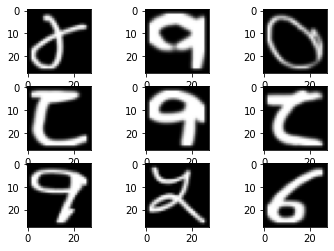

In [4]:
train_images,  val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))
print('Validation: X=%s, y=%s' % (val_images.shape, val_labels.shape))

# lets plot few images
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [5]:
def preProcess(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    x,img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    img=img/255
    return img

train_images = np.array(list(map(preProcess, train_images)))
test_images = np.array(list(map(preProcess, test_images)))
val_images = np.array(list(map(preProcess, val_images)))

print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(13600, 28, 28)
(3000, 28, 28)
(3400, 28, 28)


In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(13600, 28, 28, 1)
(3000, 28, 28, 1)
(3400, 28, 28, 1)


In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Conv2D(64, (3,3),  activation="relu"),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [0]:
#Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.2,
                             shear_range=0.1,
                             rotation_range=10)

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [11]:
import time
start_time = time.time()

callbacks = myCallback()
history = model.fit(datagen.flow(train_images, train_labels),
                              epochs = 30, validation_data = (val_images, val_labels), callbacks = [callbacks])


print("--- %s seconds to finish training model ---" % (time.time() - start_time))

Epoch 1/30
425/425 [==============================] - 7s 16ms/step - loss: 1.1868 - accuracy: 0.5889 - val_loss: 0.2915 - val_accuracy: 0.9215
Epoch 2/30
425/425 [==============================] - 7s 16ms/step - loss: 0.5295 - accuracy: 0.8230 - val_loss: 0.1141 - val_accuracy: 0.9632
Epoch 3/30
425/425 [==============================] - 7s 16ms/step - loss: 0.3851 - accuracy: 0.8768 - val_loss: 0.0672 - val_accuracy: 0.9774
Epoch 4/30
425/425 [==============================] - 7s 16ms/step - loss: 0.3020 - accuracy: 0.9073 - val_loss: 0.0493 - val_accuracy: 0.9856
Epoch 5/30
425/425 [==============================] - 7s 16ms/step - loss: 0.2551 - accuracy: 0.9194 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 6/30
425/425 [==============================] - 7s 16ms/step - loss: 0.2219 - accuracy: 0.9293 - val_loss: 0.0354 - val_accuracy: 0.9885
Epoch 7/30
425/425 [==============================] - 7s 16ms/step - loss: 0.2089 - accuracy: 0.9354 - val_loss: 0.0369 - val_accuracy: 0.9874

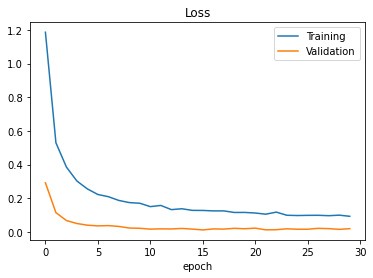

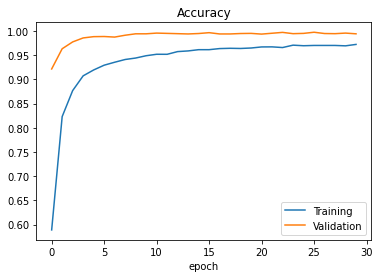

In [12]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

In [13]:
score = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss : ', score[0])
print('Test Accuracy : ', score[1])

94/94 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9967
Test loss :  0.0100262351334095
Test Accuracy :  0.996666669845581


In [14]:
model.save('digit_recognizer_modelv2')
model.save("digit_recognizer_modelv2.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit_recognizer_modelv2/assets
